In [7]:
import pandas as pd

In [8]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [9]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [11]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [12]:
wine.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

### 히트맵

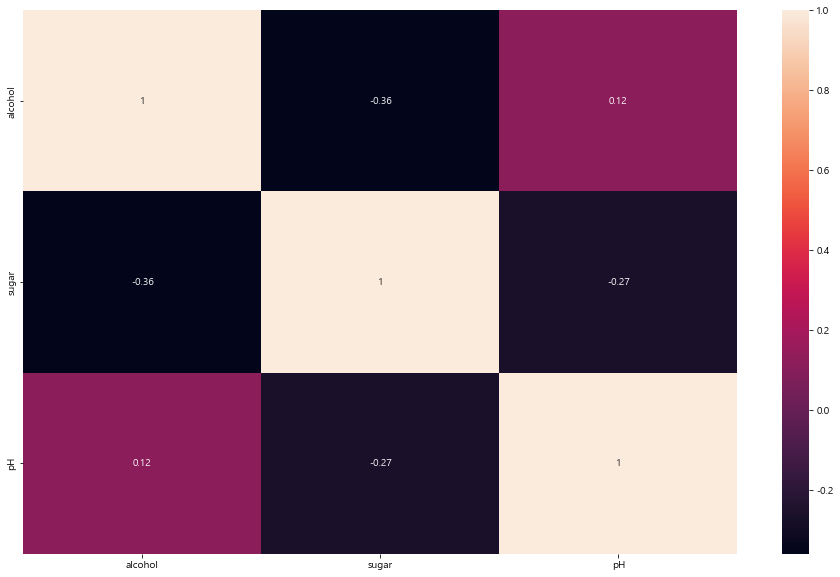

In [17]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))

sns.heatmap(wine.drop(columns='class',inplace=False).corr(), annot=True)

plt.show()

## 정규성 검정

### 히스토그램

In [21]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [51]:
data = wine[['alcohol', 'sugar', 'pH']]

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

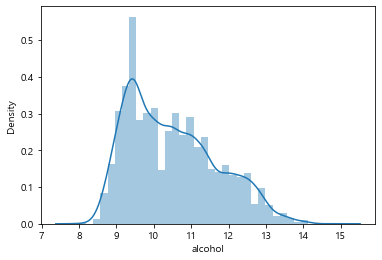

In [38]:
sns.distplot(wine['alcohol'])

<AxesSubplot:xlabel='sugar', ylabel='Density'>

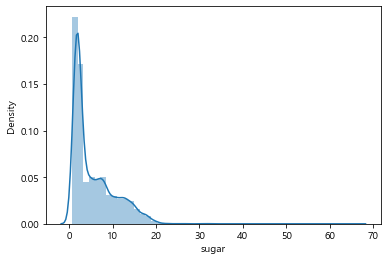

In [39]:
sns.distplot(wine['sugar'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

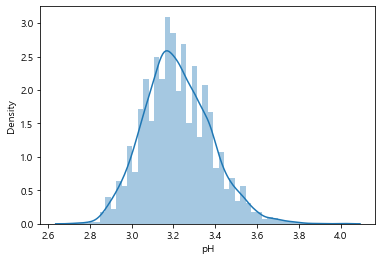

In [40]:
sns.distplot(wine['pH'])

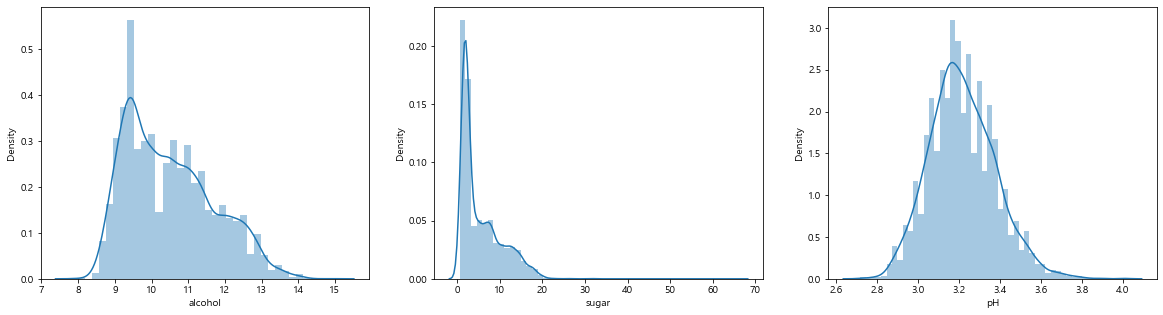

In [48]:
# for문과 subplot를 사용한 히스토그램 생성
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 3   # subplot 컬럼 수
nrows = 1   # subplot 행 수

fig, axes = plt.subplots(nrows, ncols)  # subplot 행, 열 설정
fig.set_size_inches((20, 5))            # subplot 사이즈 설정

for col, ax in zip(data, axes.T.ravel()):   # T : transpose(전치행렬)
    sns.distplot(data[col], ax=ax)          # ravel : 1차원으로 변환

plt.show()

### 파이썬 내장함수 zip()
- 여러개의 iterable 자료형의 요소 개수가 동일할 때 사용한다.
- 각각의 요소를 순서대로 묶어서 새로운 iterable 자료형을 생성한다.
- iterable 자료형 예: 리스트, 튜플

In [49]:
a = [1, 2, 3]
b = [1, 2, 3]

for aa, bb in zip(a, b):
    print(aa, bb)

1 1
2 2
3 3


### 박스플롯

<AxesSubplot:>

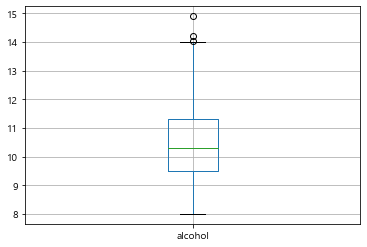

In [55]:
data[['alcohol']].boxplot()

<AxesSubplot:>

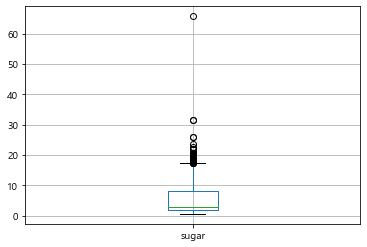

In [58]:
data[['sugar']].boxplot()

<AxesSubplot:>

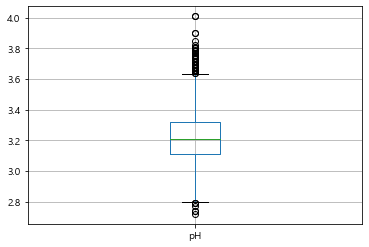

In [59]:
data[['pH']].boxplot()

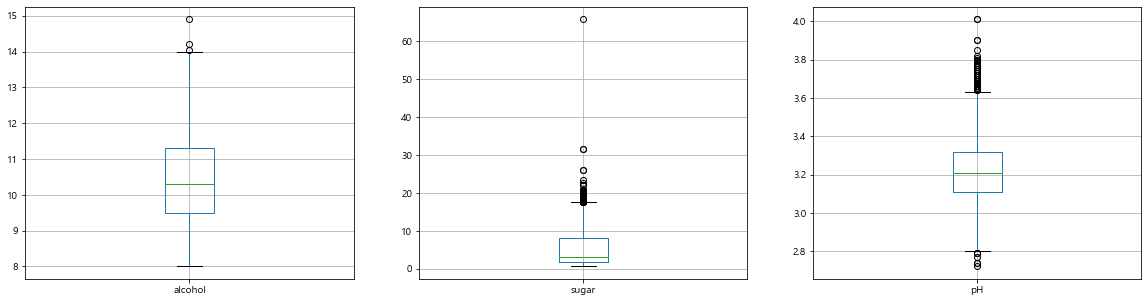

In [53]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 3   # subplot 컬럼 수
nrows = 1   # subplot 행 수

fig, axes = plt.subplots(nrows, ncols)  # subplot 행, 열 설정
fig.set_size_inches((20, 5))            # subplot 사이즈 설정

for col, ax in zip(data, axes.T.ravel()):   # T : transpose(전치행렬)
    data[[col]].boxplot(ax=ax)              # ravel : 1차원으로 변환

plt.show()

### Q-Q Plot

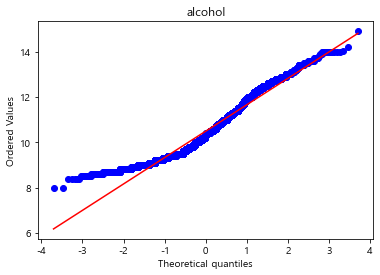

In [65]:
from scipy import stats

stats.probplot(data['alcohol'], dist=stats.norm, plot=plt)
plt.title('alcohol')

plt.show()

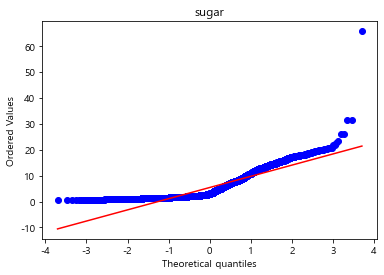

In [66]:
stats.probplot(data['sugar'], dist=stats.norm, plot=plt)
plt.title('sugar')

plt.show()

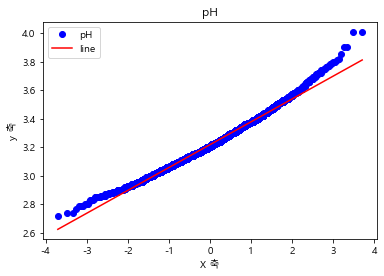

In [72]:
stats.probplot(data['pH'], dist=stats.norm, plot=plt)
plt.title('pH')

plt.xlabel('X 축')
plt.ylabel('y 축')
plt.legend(['pH', 'line'])
plt.show()

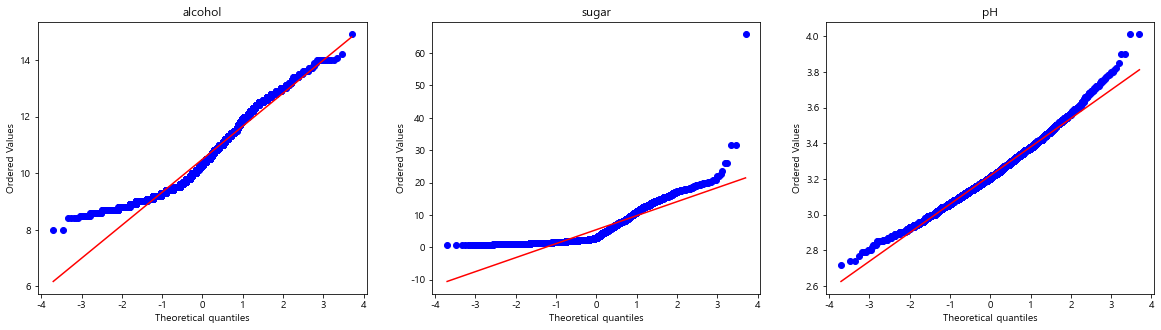

In [60]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 3   # subplot 컬럼 수
nrows = 1   # subplot 행 수

fig, axes = plt.subplots(nrows, ncols)  # subplot 행, 열 설정
fig.set_size_inches((20, 5))            # subplot 사이즈 설정

for ax, i in zip(axes.T.ravel(), data):   # T : transpose(전치행렬), ravel : 1차원으로 변환
    stats.probplot(data[i], dist=stats.norm, plot=ax)   # dist=stats.norm : 정규성 검정
    ax.set_title(str(i))

plt.show()